<div align="center">
    
# ΠΑΝΕΠΙΣΤΗΜΙΟ ΚΡΗΤΗΣ
# Τμήμα Επιστήμης Υπολογιστών

## HY-370: Ψηφιακή Επεξεργασία Σημάτων
## Χειμερινό Εξάμηνο 2023-2024
### Διδάσκοντες: Γ. Στυλιανού, Γ. Καφεντζής

## Ανάθεση: 16 Οκτωβρίου 2023
## Παράδοση: 2 Νοέμβρη 2023, 23:59:59

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Audio      # βιβιοθήκη για να "παίζουμε" ήχους (μεταξύ άλλων)
from scipy import signal
from scipy.io import wavfile
import time

# Άσκηση 1 - Διόρθωση σφαλμάτων σε ψηφιακές εικόνες (50 μ.)

Τα συστήματα DVD αποθηκεύουν τις εικόνες που αποτελούν ένα video με μορφή σειρών από ψηφιακούς αριθμούς. Αν υπάρχει κάποιο πρόβλημα στο δισκάκι (ελαφρά γρατζουνιά, φθορά, σκόνη), το σύστημα του DVD προσπαθεί να "καθαρίσει" το δίσκο από το πρόβλημα χρησιμοποιώντας φίλτρα (δηλ. συστήματα διακριτού χρόνου που περιγράφονται ως εξισώσεις διαφορών!!!). Εδώ θα εξετάσουμε δυο τέτοια απλά συστήματα.
* Το πρώτο είναι το φίλτρο **κυλιόμενης μέσης τιμής (moving average)**. Συγκεκριμένα, θα χρησιμοποιήσουμε ένα τέτοιο φίλτρο τριών σημείων (3-point Moving Average - Κυλιόμενης Μέσης Τιμής τριών σημείων), το οποίο έχετε δει στις διαλέξεις:
$$ y[n] = \frac{1}{3}x[n+1] + \frac{1}{3}x[n] + \frac{1}{3}x[n-1] = \frac{1}{3}\sum_{k=-1}^{1} x[n-k] \tag{1}$$
* Το δεύτερο είναι ένα φίλτρο **μεσαίας τιμής (median filter)**, επίσης τριών σημείων:
$$ y[n] = \textrm{median}(x[n+1], x[n], x[n-1]) \tag{2}$$
το οποίο επιλέγει τη μεσαία τιμή (ταξινομώντας τα δείγματα εισόδου κατά αύξουσα σειρά). Παρατηρήστε ότι και τα δυο φίλτρα απαιτούν μόνο $3$ τιμές της εισόδου για να παράξουν μια τιμή της εξόδου.

i. Χρησιμοποιώντας την εντολή 

    A = mpimg.imread('Saturn.tif')

διαβάστε την εικόνα Saturn.tif που σας δίνεται στα αρχεία του εργαστηρίου. Δείτε τη με την εντολή 

    plt.imshow(A, cmap=plt.get_cmap('gray'))
    plt.show()

Υποθέστε ότι αυτή είναι μια καθαρή εικόνα από ένα DVD δίσκο.

## Απάντηση:

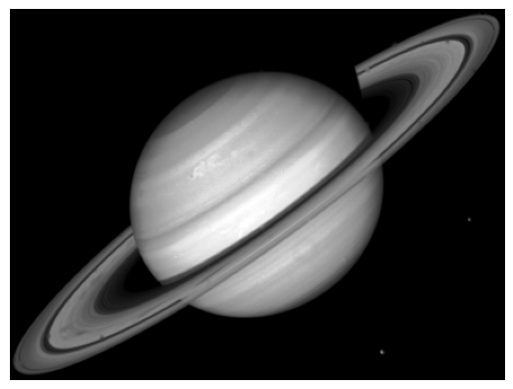

In [2]:
# Insert code here

A = mpimg.imread('Saturn.tif')
plt.imshow(A, cmap=plt.get_cmap('gray'))
plt.xticks([])
plt.yticks([])
plt.show()

ii. Χρησιμοποιώντας την εντολή 

    B = mpimg.imread('NoiseSaturn.tif')

διαβάστε την εικόνα NoiseSaturn.tif. Δείτε τη με την εντολή 

    plt.imshow(B, cmap=plt.get_cmap('gray'))
    plt.show()

Ο θόρυβος που βλέπετε να έχει προστεθεί στην εικόνα ονομάζεται *salt and pepper noise* (θόρυβος "αλάτι και πιπέρι", λόγω της μορφής του). Υποθέστε ότι προήλθε από σφάλμα ανάγνωσης του δίσκου DVD λόγω φθοράς.

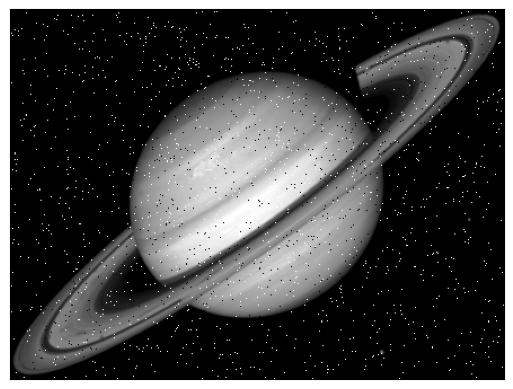

In [3]:
# Insert code here

B = mpimg.imread('NoiseSaturn.tif')
plt.imshow(B, cmap=plt.get_cmap('gray'))
plt.xticks([])
plt.yticks([])
plt.show()

iii. Προσπαθήστε να εφαρμόσετε τα παραπάνω φίλτρα για να καθαρίσετε την εικόνα B. Σκεφτείτε ότι η εικόνα είναι ένας πίνακας $M$ x $N$, που σας είναι γνωστά. Κάθε τιμή του πίνακα αποτελεί ένα 
pixel της εικόνας. Εφαρμόστε τα φίλτρα σας κατά γραμμές ή κατά στήλες του πίνακα. Θεωρήστε ότι κάθε γραμμή (ή στήλη) αποτελεί ένα μονοδιάστατο σήμα $x[n]$ για τις παραπάνω εξισώσεις, το οποίο πρέπει να διατρέχετε σε τριάδες, με μετατόπιση ένα δείγμα κάθε φορά. Η έξοδος $y[n]$ θα είναι μια αριθμητική τιμή την οποία θα αποθηκεύσετε σε έναν πίνακα C, στην κατάλληλη θέση. Προσέξτε το type casting μεταξύ των εικόνων όταν τις απεικονίζετε (ο κώδικας παρακάτω βοηθά σε αυτό). 

Συνίσταται να ακολουθήστε τον παρακάτω κώδικα-σκελετό που αφορά το φίλτρο της Σχέσης (1) εφαρμοσμένο στις γραμμές της εικόνας:

    # Initialize C
    M = B.shape[0]
    N = B.shape[1]
    C = np.zeros((M,N))

    #  Cast to double for processing
    B = B.astype(float)

    #  Apply a moving average (MA) filter in every row
    for i in range(0,M):          # Process rows B[i,:]
         for j in range(1,N-1):     # Why from 1 to N-1 and not from 0 to N?
            x = # INSERT CODE HERE - use B matrix to get 
                # triads of data of row i
            y = # INSERT CODE HERE - use x vector to implement 
                # your filter
            C[i,j] = y              # Store result in another matrix

    #  Cast it to unsigned int
    C = C.astype(np.uint8)

    #  Show the result
    plt.figure
    plt.imshow(C, cmap=plt.get_cmap('gray'))
    plt.title('MA-filtered image in rows')
    plt.show()

Μπορείτε αν θέλετε να χρησιμοποιήσετε τις συναρτήσεις $\textrm{sum}$, $\textrm{mean}$, $\textrm{median}$, αλλά **μόνο αυτές**. Με όμοια φιλοσοφία φιλτράρετε κατά στήλες με το ίδιο φίλτρο (προσέξτε το indexing στους βρόχους επανάληψης), και στη συνέχεια κάνετε τα ίδια για το φίλτρο της Σχέσης (2).

**Για κάθε ένα από τα δυο φίλτρα:**

iv. Παραδώστε κώδικα που παράγει δυο εικόνες του πίνακα C, μια που έχει προέλθει από φιλτράρισμα των *γραμμών* του πίνακα B, και μια που έχει προέλθει από φιλτράρισμα των *στηλών* του πίνακα B. Σχολιάστε τις παρατηρήσεις σας. Εν γένει, θα χαρακτηρίζατε και τα δυο φίλτρα ως αποδοτικά;

## Απάντηση:

**Φίλτρο κυλιόμενης μέσης τιμής τριών σημείων**

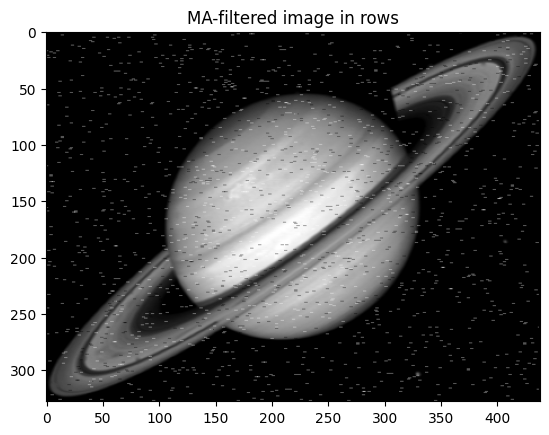

In [4]:
B = mpimg.imread('NoiseSaturn.tif')

#  3-point Moving Average in rows

# Initialize C
M = B.shape[0]
N = B.shape[1]
C = np.zeros((M,N))

#  Cast to double for processing
B = B.astype(float)

#  Apply a moving average (MA) filter in every row
for i in range(0,M):          # Process rows B[i,:]
    for j in range(1,N-1):     # Why from 1 to N-1 and not from 0 to N?
        x = B[i,j-1:j+2]
        y = x.mean()
        C[i,j] = y              # Store result in another matrix

#  Cast it to unsigned int
C = C.astype(np.uint8)

#  Show the result
plt.figure
plt.imshow(C, cmap=plt.get_cmap('gray'))
plt.title('MA-filtered image in rows')
plt.show()

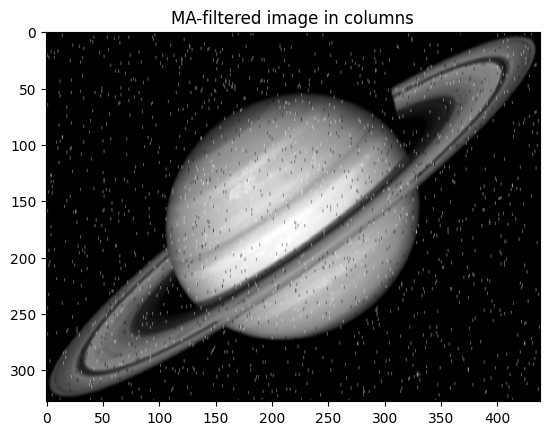

In [5]:
#  3-point Moving Average in columns

# Initialize C
M = B.shape[0]
N = B.shape[1]
C = np.zeros((M,N))

#  Cast to double for processing
B = B.astype(float)

#  Apply a moving average (MA) filter in every row
for j in range(0,N):          # Process rows B[i,:]
    for i in range(1,M-1):     # Why from 1 to N-1 and not from 0 to N?
        x = B[i-1:i+2,j]
        y = x.mean()
        C[i,j] = y              # Store result in another matrix

#  Cast it to unsigned int
C = C.astype(np.uint8)

#  Show the result
plt.figure
plt.imshow(C, cmap=plt.get_cmap('gray'))
plt.title('MA-filtered image in columns')
plt.show()

### Παρατηρήσεις:

#### Γράψτε εδώ τις παρατηρήσεις σας.

Μπορούμε να δούμε ότι από μόνο του κανένα από τα 2 φίλτρα δεν ήταν και πολύ αποτελεσματικό στην αποθορυβοποίηση της εικόνας. Επίσης η διαφορά τους φαίνεται στο γεγονός ότι το row-wise φαίνεται να έχει εισάγει ένα ίχνος οριζόντιας κίνησης στην εικόνα, ενώ το column-wise κατακόρυφης κίνησης, το οποίο είναι αποτέλεσμα του moving average φίλτρου.

**Φίλτρο μεσαίας τιμής τριών σημείων**

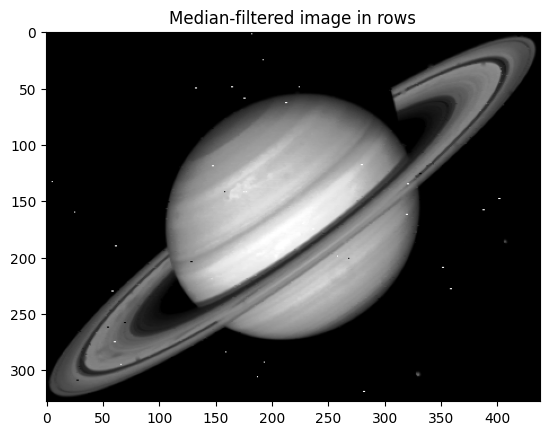

In [6]:
# 3-point Median filter in rows

# Initialize C
M = B.shape[0]
N = B.shape[1]
C = np.zeros((M,N))

# Cast to double for processing
B = B.astype(float)

#  Apply a median filter in every row
for i in range(0,M):       # Process rows B[i,:]
    for j in range(1,N-1):     # Why from 1 to N-2 and not from 0 to N-1?
        x = B[i,j-1:j+2]
        y = np.median(x)
        C[i,j] = y 

#  Cast it to unsigned int
C = C.astype(np.uint8)

#  Show the result
plt.figure
plt.imshow(C, cmap=plt.get_cmap('gray'))
plt.title('Median-filtered image in rows')
plt.show()

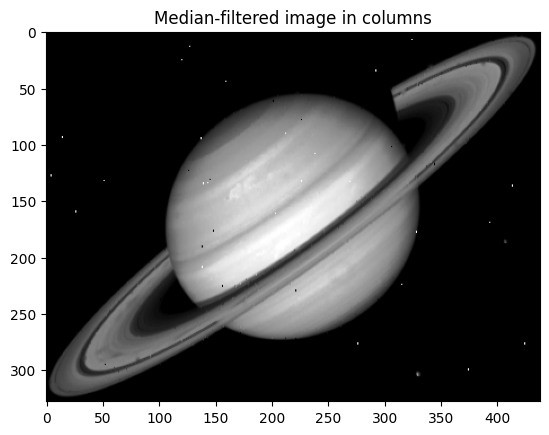

In [7]:
B = mpimg.imread('NoiseSaturn.tif')

# 3-point Median filter in columns

# Initialize C
M = B.shape[0]
N = B.shape[1]
C = np.zeros((M,N))

# Cast to double for processing
B = B.astype(float)

# Apply a median filter in every column
for j in range(0,N):       # Process columns B[:,j]
    for i in range(1,M-1):     # Why from 1 to M-2 and not from 0 to M-1?
        x = B[i-1:i+2,j]
        y = np.median(x)
        C[i,j] = y

#  Cast it to unsigned int
C = C.astype(np.uint8)

#  Show the result
plt.figure; 
plt.imshow(C, cmap=plt.get_cmap('gray'))
plt.title('Median-filtered image in columns')
plt.show()

### Παρατηρήσεις:

#### Γράψτε εδώ τις παρατηρήσεις σας.


Βλέπουμε ότι τα median φίλτρα είναι σαφώς καλύτερα στην αποθορυβοποίηση από ότι τα moving average φίλτρα, ωστόσο και πάλι έχουν περιθώριο για βελτίωση καθώς ένα (μικρό) μέρος του θορύβου παραμένει και στα 2.

v. Παραδώστε κώδικα που εφαρμόζει τα φίλτρα σας διαδοχικά (π.χ. εφαρμόστε ένα φίλτρο πρώτα σε γραμμές, και στο αποτέλεσμα που θα πάρετε εφαρμόστε το ίδιο φίλτρο ξανά κατά στήλες). Υλοποιήστε αυτή την προσέγγιση και με τα δυο φίλτρα. Παίρνετε καλύτερο αποτέλεσμα από πριν; Σχολιάστε.

## Απάντηση:

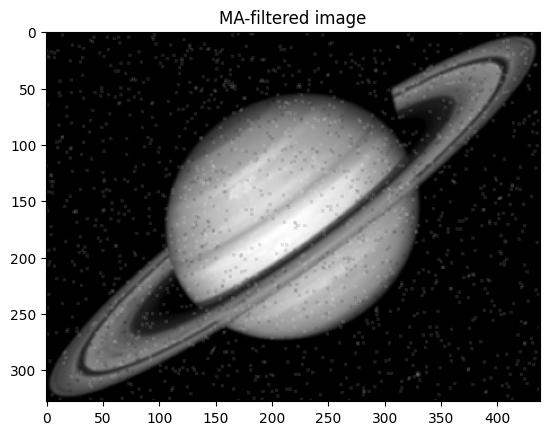

In [8]:
#  3-point Moving Average in rows and columns

#  Initialize C
M = B.shape[0]
N = B.shape[1]
C = np.zeros((M,N))
D = np.zeros((M,N))

#  Cast to double for processing
B = B.astype(float)

for i in range(0,M):
    for j in range(1,N-1):
        x = B[i,j-1:j+2]
        y = x.mean()
        C[i,j] = y

for j in range(0,N):
    for i in range(1,M-1):
        x = C[i-1:i+2,j]
        y = x.mean()
        D[i,j] = y 

#  Cast it to unsigned int
D = D.astype(np.uint8)

#  Show the result
plt.figure 
plt.imshow(D, cmap=plt.get_cmap('gray'))
plt.title('MA-filtered image')
plt.show()

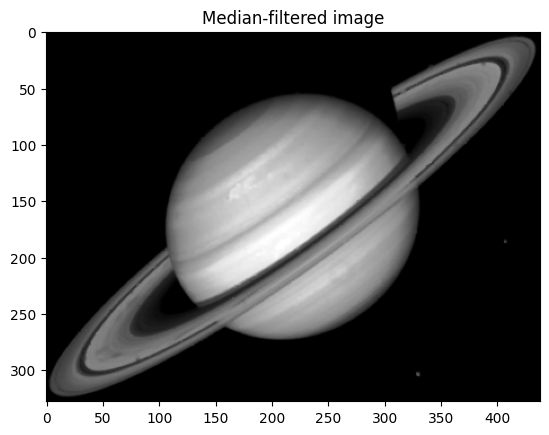

In [9]:
# 3-point Median filter in rows & columns

# Initialize C
M = B.shape[0]
N = B.shape[1]
C = np.zeros((M,N))
D = np.zeros((M,N))
# Cast to double for processing
B = B.astype(float)

for i in range(0,M):
    for j in range(1,N-1):
        x = B[i,j-1:j+2]
        y = np.median(x)
        C[i,j] = y

for j in range(0,N):
    for i in range(1,M-1):
        x = C[i-1:i+2,j]
        y = np.median(x)
        D[i,j] = y

# Cast it to unsigned int
D = D.astype(np.uint8)

#  Show the result
plt.figure
plt.imshow(D, cmap=plt.get_cmap('gray'))
plt.title('Median-filtered image')
plt.show()

### Παρατηρήσεις:

#### Γράψτε εδώ τις παρατηρήσεις σας.

Ο συνδυασμός των 2 moving average φίλτρων έχει καλύτερα αποτελέσματα από την εφαρμογή ενός από τα 2 μόνο, ωστόσο δεν συγκρίνεται με το median φίλτρο, το οποίο συνολικά αφαίρεσε τον θόρυβο εντελώς από την εικόνα.

---
---

# Άσκηση 2 - Αποθορυβοποίηση στην Aegean

Στα αεροπλάνα, η ηλεκτρική ισχύς είναι στα $400$ Hz (ενώ στα σπίτια είναι στα $50-60$ Hz) διότι οι αντίστοιχοι μετασχηματιστές είναι ελαφρύτεροι και μικρότεροι (σπουδαία ιδιότητα για εξοπλισμό αεροσκάφους!). Για τον λόγο αυτό, όταν γίνεται κάποια ανακοίνωση από τα ηχεία του αεροπλάνου, στο σήμα της φωνής προστίθεται ένα συνημίτονο συχνότητας $400$ Hz. Το αποτέλεσμα δεν είναι ευχάριστο στο αυτί μας. Καλείστε να φτιάξετε ένα φίλτρο (ΓΧΑ σύστημα) το οποίο να αφαιρεί το παραπάνω ενοχλητικό σήμα χωρίς να καταστρέφει το σήμα της φωνής.

Για το πείραμά σας, χρησιμοποιήστε το αρχείο 4781_8k.wav, το οποίο θα φορτώσετε και ακούσετε ως εξής:

    fs, s = wavfile.read('./4781_8k.wav')     # διαβάζουμε το συνοδευτικό wav αρχείο
    s = s / (2**15)                           # κανονικοποίηση
    Audio(s, rate=fs)                         # ακούμε! :)

## Απάντηση: 

In [10]:
fs, s = wavfile.read('./4781_8k.wav')     # διαβάζουμε το συνοδευτικό wav αρχείο
s = s / (2**15)                           # κανονικοποίηση
Audio(s, rate=fs)                         # ακούμε! :)

Ακολουθήστε τα παρακάτω βήματα:

(α') Προφανώς μπορείτε να επιβεβαιώσετε ότι για ένα σύστημα με απόκριση σε συχνότητα

$$H(e^{j\omega}) = 1 - e^{-j(\omega-\omega_0)} \tag{3}$$

ισχύει $H(e^{j\omega_0}) = 0$, δηλ. η απόκριση συχνότητας μηδενίζεται για $\omega = \omega_0$. Αυτό σημαίνει ότι το σύστημα αυτό μηδενίζει/καταστέλλει πλήρως τη **θετική** (MONO) συχνότητα $\omega_0$ του σήματος που λαμβάνει στην είσοδό του (γιατί όπως ξέρετε ένα σήμα αναλύεται τόσο σε θετικές όσο και σε αρνητικές συχνότητες). Θεωρήστε ότι έχετε ένα σήμα εισόδου της μορφής

$$x[n]= \cos(\omega_0 n) \tag{4}$$

---

---

(β') Ποιά θα είναι η έξοδος $y[n]$ όταν το παραπάνω σήμα $x[n]$ (όπως το αναπτύξατε στο (α') ερώτημα) περάσει από ένα **οποιοδήποτε** σύστημα με απόκριση σε συχνότητα $H(e^{j\omega})$; Εκμεταλλευτείτε το γεγονός ότι το σήμα εισόδου είναι άθροισμα *ιδιοσυναρτήσεων* του συστήματος και εκφράστε την απάντησή σας συναρτήσει των *ιδιοτιμών* του συστήματος (δηλ. ως ένα άθροισμα δυο όρων). **Γράψτε παρακάτω την απάντησή σας αναλυτικά**.

## Απάντηση:

<!-- $x[n] = cos(\omega_0 n) = \frac{1}{2}e^{j\omega_0 n} + \frac{1}{2}e^{-j\omega_0 n}$ -->
$x[n] = \cos(\omega_0 n)$ το οποίο είναι ιδιοσυνάρτυση για ένα πραγματικό ΓΧΑ σύστημα <br>
$\Rightarrow y[n] = |H(e^{jω_0})| \cos(ω_0n + \angle{H(e^{jω_0})})$

---

(γ') Με βάση την προηγούμενη απάντησή σας, βρείτε στο χαρτί σας ένα φίλτρο $H_z(e^{j\omega})$ με τις εξής ιδιότητες:

*  Μηδενίζει και τους δυο όρους του σήματος εισόδου $x[n]$ που έχετε βρει παραπάνω, δηλ. η έξοδος του συστήματος όταν στην είσοδό του εμφανιστεί το σήμα $x[n]$ της Σχέσης (4) να είναι $$y[n] = 0, \: \: \forall n$$ 

*  Αποτελείται από δυο υποσυστήματα **σε σειρά**, με το ένα εξ αυτών να είναι το σύστημα $H(e^{j\omega})$ που σας δίνεται παραπάνω στη Σχέση (3), καθώς και ένα ... πολύ *παρόμοιό* του. Διαβάστε προσεκτικά τι κάνει το φίλτρο της Σχέσης (3) όπως σας περιγράφεται παραπάνω και εύκολα θα βρείτε και το *παρόμοιό* του.

## Απάντηση:

$H_1(e^{jω}) = H(e^{jω}) = 1 - e^{-j(ω-ω_0)}$ <br>
$H_2(e^{jω}) = 1 - e^{-j(ω+ω_0)}$ <br>
Όπως αναφέρθηκε παραπάνω, το $H_1(e^{jω})$ μηδενίζει τη θετική συχνότητα $ω_0$ και άρα το $H_2(e^{jω})$ μηδενίζει την αρνητική συχνότητα $-ω_0$ <br>

$H_z(e^{jω}) = H_1(e^{jω})H_2(e^{jω})$ <br>
$H_z(e^{jω}) = 1 - e^{-j(ω-ω_0)} - e^{-j(ω+ω_0)} + e^{-j(ω-ω_0)}e^{-j(ω+ω_0)}$ <br>
$H_z(e^{jω}) = 1 - e^{-j}(e^{jω}+e^{-jω}) + e^{-j(ω-ω_0)-j(ω+ω_0)}$ <br>
$H_z(e^{jω}) = 1 - e^{-j}(2\cosω_0) + e^{-jω+jω_0-jω-jω_0}$ <br>
$H_z(e^{jω}) = 1 - 2\cosω_0e^{-j} + e^{-2jω}$

---

(δ') Μετατρέψτε το φίλτρο $H_z(e^{j\omega})$ που βρήκατε παραπάνω σε εξίσωση διαφορών στο χαρτί σας (χρησιμοποιήστε ιδιότητες) και **γράψτε παρακάτω την εξίσωση που καταλήξατε**.

## Απάντηση:
(Hint: θα πρέπει να βρείτε το παρακάτω)

$$y[n] = x[n] - 2\cos(\omega_0)x[n-1] + x[n-2]$$

$H_z(e^{jω}) = \frac{Y(e^{jω})}{X(e^{jω})} = 1 - 2\cosω_0e^{-j} + e^{-2jω}$ <br>
$\Rightarrow Y(e^{jω}) = X(e^{jω})(1 - 2\cosω_0e^{-j} + e^{-2jω})$ <br>
$\Rightarrow Y(e^{jω}) = X(e^{jω}) - 2\cosω_0e^{-j}X(e^{jω}) + e^{-2jω}X(e^{jω})$ <br>
$\xRightarrow{F^{-1}} y[n] = x[n] - 2\cos(ω_0)x[n-1] + x[n-2]$

----

(ε) Η συνάρτηση $H = \textrm{signal.freqz(B,A,W)}$ υπολογίζει την απόκριση σε συχνότητα $H(e^{j\omega})$ μιας εξίσωσης διαφορών της μορφής

$$\sum_{k=0}^N a_k y[n-k] = \sum_{l=0}^N b_l x[n-l] \tag{5}$$

Δέχεται τους συντελεστές της εισόδου $Β = [b_0, \: b_1, \: \cdots \: b_N]$, της εξόδου $Α = [a_0,\: a_1, \: \cdots \: a_M]$, και τις συχνότητες $W$ που θέλουμε να υπολογίσουμε την απόκριση συχνότητας ως ορίσματα, και επιστρέφει τις τιμές της απόκρισης συχνότητας, $H$, στις συχνότητες $W$. Θεωρήστε ότι βλέπετε το χώρο της συχνότητας στο "παράθυρο" $(-\pi, \pi]$, κι έτσι οι συχνότητές σας θα είναι

    dw = 2*np.pi/600;
    W = np.arange(-np.pi+dw,np.pi, dw);

Χρησιμοποιήστε τη συνάρτηση $\textrm{signal.freqz}$ για να δείτε αν το φίλτρο σας όντως κάνει αυτό που πρέπει (δηλ. μηδενίζει τις κατάλληλες συχνότητες στην απόκριση πλάτους). Χρησιμοποιήστε τις συναρτήσεις plot,abs για να σχεδιάσετε το *μέτρο* της απόκρισης σε συχνότητα, δηλ. την *απόκριση πλάτους* του συστήματος και τις συναρτήσεις $\textrm{plot}, \textrm{angle}$ για να σχεδιάσετε τη *φάση* της απόκρισης σε συχνότητα, δηλ. την *απόκριση φάσης* του συστήματος. 

Αν όλα τα έχετε κάνει σωστά, θα δείτε τα γραφήματα του Σχήματος 1 (με μόνη διαφορά την κλίμακα των γραφημάτων).

![absangle2](absangle2.png)

*Σχήμα 1: Απόκριση πλάτους και φάσης συστήματος $H_z(e^{j\omega})$.*


## Απάντηση:

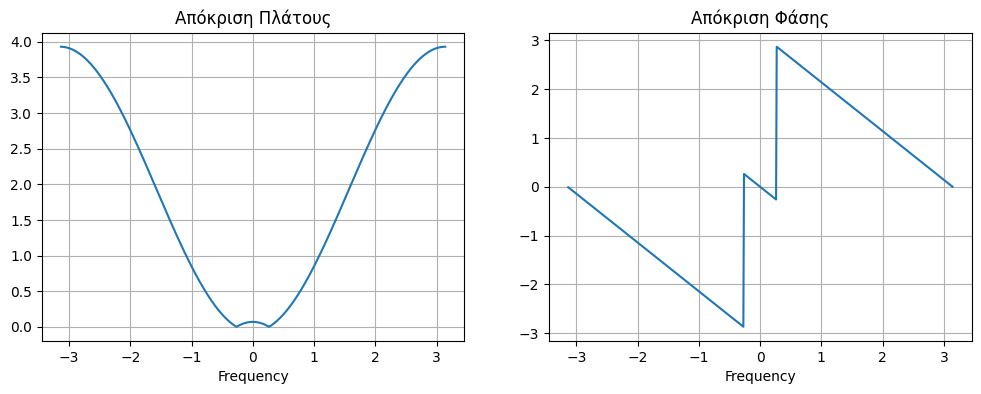

In [11]:
f0 = 400
w0 = 50

dw = 2*np.pi/600
W = np.arange(-np.pi+dw,np.pi, dw)

A = np.array([1])
B = np.array([1, -2*np.cos(w0), 1])
H = signal.freqz(B, A, W)

H = np.transpose(H)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(W, np.abs(H[:,1]))
plt.grid(True)
plt.xlabel('Frequency')
plt.title('Απόκριση Πλάτους')
plt.subplot(1,2,2)
plt.plot(W, np.angle(H[:,1])) 
plt.grid(True)
plt.xlabel('Frequency')
plt.title('Απόκριση Φάσης')
plt.show()

---

(στ') Χρησιμοποιήστε τη συνάρτηση $\textrm{signal.lfilter}$ για να υλοποιήσετε το σύστημα και να βρείτε την εξοδό του, δίνοντας ως είσοδο το πραγματικό σήμα φωνής που έχετε φορτώσει παραπάνω. Η $\textrm{signal.lfilter}$ συντάσσεται ως $\textrm{y = signal.lfilter(B,A,x)}$, με $B$ τους συντελεστές της εισόδου στην εξίσωση διαφορών, $A$ τους συντελεστές της εξόδου στην εξίσωση διαφορών, και $x$ το διάνυσμα του σήματος εισόδου (σήμα φωνής). Ακούστε το σήμα εξόδου.

## Απάντηση:

In [12]:
cleansig = signal.lfilter(B, A, s)
Audio(cleansig, rate=fs)

---

(ζ') **Αναφέρετε παρακάτω πως αντιλαμβάνεστε ακουστικά αυτήν την αλλοίωση. Λάβετε υπ'όψη σας την απόκριση πλάτους του συστήματος για να απαντήσετε**. Σε επόμενο εργαστήριο, θα δείτε πως να φτιάξετε ένα *πολύ* καλύτερο φίλτρο από αυτό.

### Παρατηρήσεις:

Ακούγοντας την ανακοίνωση του αεροπλάνου μετά την εφαρμογή του φίλτρου, αντιλαμβανόμαστε ότι η φωνή ακούγεται πιο υψηλή.
Αυτό συμβαίνει επειδή, όπως φαίνεται στη απόκριση πλάτους, το φίλτρο μειώνει τις χαμηλές συχνότητες του σήματος.

---
---

# Άσκηση 3 - Agent 007: ανίχνευση αριθμού τηλεφώνου

Όταν πληκτρολογούμε ένα τηλεφωνικό νούμερο στο κινητό μας ή σε ένα οποιοδήποτε τηλέφωνο με πλήκτρα, δημιουργούμε για κάθε αριθμό δυο συνημίτονα. Για παράδειγμα, όταν πληκτρολογούμε τον αριθμό $0$, δημιουργούμε ένα άθροισμα δυο συνημιτόνων με συχνότητες $941$ και $1336$ Hz έκαστο, ήτοι

$$ x_0[n] = \cos\Big(2\pi 941 \frac{n}{f_s}\Big) + \cos\Big(2\pi 1336 \frac{n}{f_s}\Big) \tag{6}$$

με $f_s$ τη συχνότητα δειγματοληψίας, η οποία είναι $f_s = 8000$ Hz για όλο το σύστημα. Το πρότυπο αυτό ονομάζεται **DTMF - Dual-Tone Multi-Frequency**, και ο πίνακας που αντιστοιχεί σε αυτό φαίνεται παρακάτω στον πίνακα του Σχήματος 2.

![DTMF](DTMF.jpg)

*Σχήμα 2: Πίνακας Πρότυπου DTMF.*

Οι συχνότητες που αντιστοιχούν σε κάθε αριθμό δεν έχουν επιλεγεί τυχαία. 
- Καμιά από τις συχνότητες δεν είναι πολλαπλάσιο κάποιας άλλης, 
- Καμιά δεν αποτελεί άθροισμα ή διαφορά οποιωνδήποτε άλλων δυο συχνοτήτων του πίνακα. 

Η συνθήκη αυτή διευκολύνει πολύ τον εντοπισμό των συχνοτήτων (και άρα τον αριθμό). 

Για τους σκοπούς μας, κάθε άθροισμα συνημιτόνων (δηλ. κάθε τηλεφωνικός *τόνος*) διαρκεί $0.5$ δευτερόλεπτα, ενώ υπάρχει μια παύση (σιωπή) μεταξύ των τόνων, διάρκειας $0.1$ δευτερολέπτων. Στο διακριτό χρόνο, η παύση δεν είναι τίποτε άλλο από ένα διάνυσμα γεμάτο μηδενικά, κατάλληλης διάρκειας δειγμάτων. Υποθέτουμε ότι ο αριθμός που ψάχνουμε έχει συντεθεί από διαδοχικές συνενώσεις τόνου + σιωπής διάρκειας $0.5 + 0.1 = 0.6$ δευτερολέπτων ο καθένας. Άρα ένα $10$ψήφιο τηλεφωνικό σήμα θα έχει διάρκεια $6$ δευτερόλεπτα. Το σκεπτικό μας είναι να χωρίσουμε το ολόκληρο το σήμα τηλεφωνικού αριθμού σε "κομμάτια" (frames) των $0.6$ δευτερολέπτων, χωρίς αυτά να επικαλύπτονται μεταξύ τους, και να ελέγχουμε σε κάθε frame αν υπάρχει κάποιος τόνος από τους παραπάνω. 

**Σκοπός αυτής της άσκησης είναι να σχεδιάσετε ένα σύστημα ζωνοπερατών (bandpass) φίλτρων (δηλ. συστημάτων) που θα φιλτράρει ένα frame κάθε φορά, και θα ελέγχει ποιό ζεύγος εξόδων φίλτρων έχει περισσότερη πληροφορία σε σχέση με τις υπόλοιπες, ελέγχοντας την ενέργειά καθεμιάς σε σχέση με ένα κατώφλι (threshold). Αυτό το ζεύγος εξόδων - που αντιστοιχεί σε ένα ζεύγος ζωνοπερατών φίλτρων - θα μας υποδείξει ποιά φίλτρα χρησιμοποιήθηκαν και άρα ποιές συχνότητες επέτρεψαν αυτά να περάσουν. Το κέντρο αυτών των συχνοτήτων θα πρέπει να είναι συχνότητες που υπάρχουν στον Πίνακα 2**.

Το σύστημα ζωνοπερατών φίλτρων θα σχεδιαστεί από ένα βασικό (ιδανικό) χαμηλοπερατό (lowpass) φίλτρο το οποίο έχει απόκριση σε συχνότητα στο διάστημα $(-\pi, \pi]$ ως

$$ H_{lp}(e^{j\omega}) = \left\{\begin{array}{lll}
1, & \displaystyle - \omega_c < \omega < \omega_c \\
 & \\
0, & \displaystyle \omega_c \leq |\omega| \leq \pi
\end{array}\right. \tag{7}$$

με $\omega_c = \pi/200$ (η οποία αντιστοιχεί σε $f_c = 20$ Hz στο συνεχή χρόνο).  **Το σκεπτικό είναι πως αντί να σχεδιάσετε πολλά διαφορετικά ζωνοπερατά φίλτρα, μπορείτε να χρησιμοποιήσετε την ιδιότητα της μετατόπισης στη συχνότητα του μετασχ. Fourier διακριτού χρόνου ώστε να μετατοπίζετε αυτό το βασικό φίλτρο γύρω από τις κατάλληλες συχνότητες $\pm \omega_0$ που σας ενδιαφέρουν, και να δημιουργείτε έτσι τα εκάστοτε ζωνοπερατά φίλτρα**. Παρατηρήστε ότι

$$ 2\cos(\omega_0n) h[n] \longleftrightarrow H(e^{j(\omega - \omega_0)}) + H(e^{j(\omega + \omega_0)}) \tag{8}$$

Το σύστημά μας αποτελείται από *ιδανικά* φίλτρα, οπότε αρκεί αυτά να έχουν άρτια συμμετρία στο χώρο της συχνότητας. Το διάγραμμα του Σχήματος 3 σας δείχνει πως δουλεύει το σύστημά σας για το πρώτο frame διάρκειας $0.6$ s, που αντιστοιχεί στον αριθμό $6$.

![Ex3Lab2](Ex3Lab2.png)

*Σχήμα 3: Διάγραμμα λειτουργίας συστήματος ανίχνευσης αριθμού για το πρώτο frame.*

Ως παράδειγμα σας δίνουμε ένα αρχείο ήχου που περιέχει τόνους από έναν αριθμό ενός κινητού τηλεφώνου. **Τελικός σκοπός σας είναι να εντοπίσετε τον αριθμό**. Μπορείτε να χρησιμοποιήσετε τις παρακάτω εντολές για να το ακούσετε.

    fs, s = wavfile.read('./cell_num.wav')    # διαβάζουμε το συνοδευτικό wav αρχείο
    s = s / (2**15)                           # κανονικοποίηση
    Audio(s, rate=fs)

Σας δίνονται επίσης **τρεις συναρτήσεις που πρέπει να συμπληρώσετε και οι οποίες εκτελούν συνολικά την ανίχνευση του αριθμού**. Ακολουθήστε τις παρακάτω οδηγίες για κάθε συνάρτηση.


**1. makeFB**

Σε αυτήν την συνάρτηση θα φτιάξετε το σύστημα ζωνοπερατών φίλτρων $h_i[n]$. Υπενθυμίζεται ότι σκοπός είναι να φτιάξετε τα φίλτρα αυτά χρησιμοποιώντας μόνο το χαμηλοπερατό φίλτρο της Σχέσης (7) και κατάλληλες πράξεις με αυτό. Το πλήθος τους σύμφωνα με το πρότυπο DTMF πρέπει να είναι επτά ($7$), ένα για κάθε μια συχνότητα, αν και στον κώδικα αυτό δίνεται ως μεταβλητή από το χρήστη για περισσότερη γενικότητα. Η συνάρτηση αυτή σας επιστρέφει έναν πίνακα που η κάθε στήλη του περιέχει $201$ δείγματα της κρουστικής απόκρισης $h[n]$ από ένα φίλτρο. Π.χ. η $3$η στήλη του πίνακα περιέχει την κρουστική απόκριση του ζωνοπερατού φίλτρου που έχει σαν κέντρο του τη συχνότητα $2\pi 852/fs$ rad/sample. Άρα ο πίνακας που κατασκευάζετε και επιστρέφει η συνάρτηση πρέπει να έχει διαστάσεις $201 \times 7$.


In [13]:
fs, s = wavfile.read('./cell_num.wav')    # διαβάζουμε το συνοδευτικό wav αρχείο
s = s / (2**15)                           # κανονικοποίηση
Audio(s, rate=fs)

(α') Συμπληρώστε στη γραμμή $20$ παρακάτω τη συχνότητα αποκοπής $\omega_c$ του βασικού χαμηλοπερατού φίλτρου που σας δίνεται παραπάνω.


---

(β') Βρείτε αρχικά στο χαρτί ποιό είναι το σήμα στο χρόνο στο οποίο αντιστοιχεί το χαμηλοπερατό φίλτρο που αναφέρεται παραπάνω στη Σχέση (7) και **παραδώστε την απάντησή σας παρακάτω**. Εκφράστε την απάντησή σας ως συνάρτηση της πολύ γνωστής σας συνάρτησης $\textrm{sinc}$.

## Απάντηση:

$
H_{lp}(e^{j\omega}) = \left\{\begin{array}{lll}
1, & \displaystyle - \omega_c < \omega < \omega_c \\
 & \\
0, & \displaystyle \omega_c \leq |\omega| \leq \pi
\end{array}\right.
\xleftrightarrow{\footnotesize{F^{-1}}}
x[n] = \Large{\frac{\sin(\omega_c n)}{πn}} = \frac{ω_c}{π} \textrm{\normalsize{sinc}}(\frac{ω_cn}{π})
$

---


(γ') Γράψτε την έκφραση που βρήκατε στη γραμμή $34$ της συνάρτησης, για να δημιουργήσετε $201$ δείγματα του βασικού χαμηλοπερατού σας φίλτρου. Υπάρχει η συνάρτηση $\textrm{sinc}$ της Python η οποία θα σας φανεί *πολύ πολύ* χρήσιμη στον κώδικά σας.

---

(δ') Βρείτε το μετασχηματισμό Fourier του σήματος 
$$ y[n] = \cos(\omega_0 n)h_{lp}[n] \tag{9}$$

στο χαρτί σας. Εκφράστε τον ως συνάρτηση του μετασχ. Fourier του $h_{lp}[n]$, δηλ. του $H_{lp}(e^{j\omega})$. **Παραδώστε την απάντησή σας παρακάτω**. Τι παρατηρείτε ότι συμβαίνει στην απόκριση συχνότητας $H_{lp}(e^{j\omega})$; **Απαντήστε παρακάτω**.

## Απάντηση:

$ y[n] = \cos(\omega_0 n)h_{lp}[n]$
$\xleftrightarrow{\footnotesize{F}}$
$ Y(e^{jω}) = πH_{lp}(e^{j(ω-ω_0)}) + πH_{lp}(e^{j(ω+ω_0)})$ <br>
δηλαδή έχουμε αντίγραφα της απόκρισης συχνότητας κεντραρισμένα στο $\pm ω_0$ (και πολλαπλασιασμένα με π).

Οπότε το φίλτρο γίνεται ζωνοπερατό για τις συχνότητες γύρω από την $ω_0$.

---

(ε') Με βάση την απάντηση που δώσατε παραπάνω, μπορείτε τώρα να συμπληρώστε τη γραμμή $39$ της συνάρτησης δημιουργώντας έτσι τα ζωνοπερατά σας φίλτρα $h_i[n]$ επιλέγοντας κατάλληλες $\omega_0$ για το καθένα. Η υλοποίησή σας πρέπει να γίνει στο πεδίο του χρόνου - μια απλή πράξη.

---

(ζ') Τέλος, στη γραμμή $41$, κανονικοποιήστε το κάθε φίλτρο που δημιουργείτε, απλά διαιρώντας το με το άθροισμα των τιμών των δειγμάτων του, 

$$\sum_{n=-\infty}^{+\infty}h_i[n] \tag{10}$$

Η συνάρτηση $\textrm{sum}$ της numpy θα σας φανεί χρήσιμη.

In [14]:
def makeFB(fr):
    # it creates a bank of band pass filters. Each filter has 40 Hz of bandwidth.
    # Filters are centered at frequencies specified by fr
    # 
    # 
    # For instance: DTMF standard:
    # makeFB([697,770,852,941,1209,1336,1477]);
    # 
    #
    # Y. Stylianou (c) UOC, CSD, 2003
    # G. Kafentzis (c) UOC, CSD, 2012 (upd)

    # Sampling frequency
    fs = 8000

    # Cutoff frequency of lowpass filter (in Hz)
    fc = 20

    # Line 20 below: Cutoff frequency of lowpass filter (in rad/sample)
    wc = np.pi/200

    # Length of the input vector
    L = len(fr)

    # Create 201 samples of filter data
    n = np.arange(-100,101)
    # allocation of memory
    h = np.zeros([len(n), L])

    # basic low-pass filter

    # Store in hlp the time domain equation of the lowpass filter
    # Line 34 below: Use "sinc" function and vector "n" above
    hlp = (wc/np.pi) * np.sinc(wc*n/np.pi)

    # Create the bandpass filters
    for i in range(0,L):
        # Line 39 below: Store in h(:,i) the i-th bandpass filter of frequency fr(i)
        w0 = 2*np.pi*fr[i]/fs       # convert fr[i] to discrete signal frequency w0
        h[:,i] = np.cos(w0*n)*hlp
        # Line 41 below: Divide your filter by the sum of its coefficients
        h[:,i] = h[:,i] / h[:,i].sum()

    return h

**2. dDTMF**

Η συνάρτηση αυτή δέχεται ως όρισμα ένα σήμα τηλεφωνικού αριθμού και εντοπίζει τον τηλεφωνικό αριθμό που μεταφέρει το σήμα. Σημειώστε ότι γίνεται κλήση της συνάρτησης $\textrm{makeFB}$. Η συνάρτηση $\textrm{dDTMF}$ σας επιστρέφει έναν πίνακα δυο στηλών ο οποίος περιέχει τις συχνότητες που μεταφέρει το σήμα, καθώς και έναν πίνακα χαρακτήρων που περιέχει τον αριθμό που ανιχνεύτηκε. Συγκεκριμένα:

(α') Γραμμή $24$: Μετατρέψτε τη διάρκεια κάθε τόνου από δευτερόλεπτα σε δείγματα. Θα σας χρειαστεί η συχνότητα δειγματοληψίας $\textrm{fs}$.

(β') Γραμμή $30$: Κάντε το ίδιο για τις σιωπές.

(γ') Γραμμή $33$: (απλό σχόλιο) Στη γραμμή αυτή, βρίσκουμε πόσα frames τόνου+σιωπής υπάρχουν σε όλο το τηλεφωνικό σήμα. Απλώς κατανοήστε γιατί δουλεύει σωστά αυτή η εντολή.

(δ') Γραμμή $45$: (απλο σχόλιο) Στη γραμμή αυτή, ο βρόχος επανάληψης διατρέχει το σήμα εισόδου ανά sh δείγματα και αποθηκεύει κάθε φορά στο διάνυσμα fr ένα κομμάτι διάρκειας όσο είναι *μόνο* η διάρκεια του τόνου (st), η οποία θεωρούμε ότι προηγείται της σιωπής πάντα.


(ε') Γραμμή $51$: Υπολογίστε την ενέργεια του κάθε κομματιού που δεσμεύεται, με βάση τη γνωστή σας σχέση

$$E = \sum_{n=-\infty}^{+\infty}x^2[n] \tag{11}$$

Ξανά, η συνάρτηση $\textrm{sum}$ της numpy θα σας φανεί χρήσιμη.

(στ') Γραμμή $55$: (απλό σχόλιο) Σε αυτή τη γραμμή, ο βρόχος επανάληψης διατρέχει όλα τα ζωνοπερατά φίλτρα που έχουμε φτιάξει στον πίνακα h και κάνει συνέλιξη καθενός από αυτά με το σήμα που βρίσκεται στο διάνυσμα fr. Προσέξτε ότι τα διαφορετικά φίλτρα βρίσκονται σε στήλες στον πίνακα h. Η διαδικασία αυτή υλοποιεί ακριβώς την έξοδο ενός ΓΧΑ συστήματος δεδομένης μιας εισόδου του (a.k.a συνέλιξη ).

(ζ΄) Γραμμή $58$: Κάνετε συνέλιξη του σήματος με το j-οστό ζωνοπερατό φίλτρο ώστε να βρείτε την έξοδο του φίλτρου. Η συνάρτηση $\textrm{conv}$ θα σας χρειαστεί σίγουρα.

(η') Γραμμή $61$: Υπολογίστε την ενέργεια του παραπάνω σήματος εξόδου με τη γνωστή σχέση της ενέργειας.

(θ') Γραμμή $64$: Πρέπει να θέσετε ένα όριο ώστε να αναγνωρίζετε πότε ένα ζωνοπερατό φίλτρο "έχει πιάσει" συχνότητα που περιέχεται στο σήμα fr. Σας προτείνεται ένα τέτοιο κριτήριο μέσα στον κώδικα ως σχόλιο.

(ι') Γραμμές $79-$τέλος: Με βάση τον Πίνακα 2, συμπληρώστε τα ζεύγη συχνοτήτων για κάθε αριθμό.


In [15]:
def dDTMF(x):
    #  Given a signal x which contains a phone number according to
    #  DTMF standard it returns the frequencies that are present
    #  in the signal and the number in a character vector
    #
    # G. Kafentzis (c) UOC, CSD, 2023

    #  DTMF frequencies
    DTMFfr = [697, 770, 852, 941, 1209, 1336, 1477]

    #  Length of the DTMF vector
    L = len(DTMFfr)

    #  Build the frequency table - call "makeFB"
    h = makeFB(DTMFfr)

    #  Sampling frequency
    fs = 8000

    #  Tone duration in sec
    d = 0.5

    #  Line 24 below: Tone duration in samples
    ds = d*fs

    #  Silence duration in sec
    sil = 0.1

    #  Line 30 below: Silence duration in samples
    sils = sil*fs

    #  Line 33 below: How many frames "tone+silence" fit in the whole signal?
    Lt = round((len(x) + sils) / (ds+sils))

    #  Frame length
    st = np.arange(0, ds)

    #  Tone and silence duration
    sh = ds + sils

    #  Initialization
    Fvec = np.zeros((Lt, 2))

    #  Line 45 below: For every frame...
    for i in range(0, Lt):

        # Get the corresponding piece out of the signal...
        fr = x[st.astype(int)]

        # Line 51 below: Calculate the energy of the frame fr
        En = np.sum(fr**2)

        k = 0
        # Line 55 below:
        for j in range(0,L):

            #  Line 58 below: Filter segment fr (use np.convolve)
            sc = np.convolve(fr, h[:,j])

            # Line 61 below: Calculte the energy after filtering
            S = np.sum(sc**2)

            # Line 64 below: Normalize S with En
            R = S / En

            H = (h[:,j]**2).sum()
            thresh = 2*H
            # Line 67 below: Find a threshold (2 times the corresp. filter h(:,j) energy works well)
            if R > thresh:
                Fvec[i,k] = DTMFfr[j]
                k = k + 1

        st = st + sh;  # move frame

    # Detect number
    [M,N] = np.shape(Fvec)
    number = ""
    # Line 79 below:
    for i in range(0,M):
        if Fvec[i,0] == 697:
            if Fvec[i,1] == 1209:
                number = number+ '1'
            elif Fvec[i,1] == 1336:
                number = number + '2'
            elif Fvec[i,1] == 1477:
                number = number + '3'

        elif Fvec[i,0] == 770:
            if Fvec[i,1] == 1209:
                number = number + '4'
            elif Fvec[i,1] == 1336:
                number = number +'5'
            elif Fvec[i,1] == 1477:
                number = number +'6'

        elif Fvec[i,0] == 852:
            if Fvec[i,1] == 1209:
                number = number + '7'
            elif Fvec[i,1] == 1336:
                number = number + '8'
            elif Fvec[i,1] == 1477:
                number = number + '9'

        elif Fvec[i,0] == 941:
            if Fvec[i,1] == 1209:
                number = number + '*'
            elif Fvec[i,1] == 1336:
                number = number + '0'
            elif Fvec[i,1] == 1477:
                number = number + '#'

    return Fvec, number

Ας δοκιμάσουμε τις συναρτήσεις που φτιάξαμε κι ας δούμε τι αριθμός προκύπτει!

In [16]:
fs, s = wavfile.read('./cell_num.wav'); 
s = s/(2**15) 
Audio(s, rate=fs)             # ακούμε! :)

[Freq, Num] = dDTMF(s)

print(f"Ο αριθμός που βρήκαμε είναι ο {Num}")

Ο αριθμός που βρήκαμε είναι ο 6945214480


**3. call**

Η συνάρτηση call σας δίνεται απλά για έλεγχο. Με αυτήν την συνάρτηση, μπορείτε να δημιουργήσετε το δικό σας ήχο από οποιοδήποτε τηλεφωνικό νούμερο, να το ακούσετε, και αν θέλετε να το ανιχνεύσετε με τη βοήθεια των συναρτήσεων που γράψατε πριν, ώστε να βεβαιωθείτε ότι δουλεύει σωστά ο κώδικά σας πριν τον χρησιμοποιήσετε για το μυστικό αριθμό που σας δίνεται. Για παράδειγμα, μπορείτε να γράψετε

    x = call([2 8 1 0 3 9 3 5 3 3]);
    [Freq, Num] = dDTMF(x);

και στη μεταβλητή Num θα πρέπει να έχετε τον αριθμό $2810393533$. Για να δουλέψει αυτή η συνάρτηση, πρέπει να συμπληρώσετε μέσα τις συχνότητες του Πίνακα 2 στις γραμμές $27-50$.


In [17]:
def call(tel):
    #  it creates a signal corresponding to the phone number
    #  specified by tel according to DTMF standard
    #  For instance: x = call([6 9 7 1 1 1 1 1 1 1]);
    #
    #
    #  (c) UOC, CSD, 2023

    fs = 8000

    d = 0.5
    ds = d*fs
    sil = 0.1
    sils = sil*fs

    Lt = len(tel)
    D = d*Lt+sil*(Lt-1)

    Ds = int(D*fs)  # in samples;

    x = np.zeros((Ds,1))
    st = np.arange(0,ds)
    sh = ds+sils
    n = np.arange(0,ds)

    # Line 27 below:
    for i in range(0,Lt):
        st=st.astype(int)
        if(tel[i]==1):
            x[st, 0] = np.cos(2*np.pi*697*n/fs)+np.cos(2*np.pi*1209*n/fs)
        elif(tel[i]==2):
            x[st, 0] = np.cos(2*np.pi*697*n/fs)+np.cos(2*np.pi*1336*n/fs)
        elif(tel[i]==3):
            x[st, 0] = np.cos(2*np.pi*697*n/fs)+np.cos(2*np.pi*1477*n/fs)
        elif(tel[i]==4):
            x[st, 0] = np.cos(2*np.pi*770*n/fs)+np.cos(2*np.pi*1209*n/fs)
        elif(tel[i]==5):
            x[st, 0] = np.cos(2*np.pi*770*n/fs)+np.cos(2*np.pi*1336*n/fs)
        elif(tel[i]==6):
            x[st, 0] = np.cos(2*np.pi*770*n/fs)+np.cos(2*np.pi*1477*n/fs)
        elif(tel[i]==7):
            x[st, 0] = np.cos(2*np.pi*852*n/fs)+np.cos(2*np.pi*1209*n/fs)
        elif(tel[i]==8):
            x[st, 0] = np.cos(2*np.pi*852*n/fs)+np.cos(2*np.pi*1336*n/fs)
        elif(tel[i]==9):
            x[st, 0] = np.cos(2*np.pi*852*n/fs)+np.cos(2*np.pi*1477*n/fs)
        else:  #0
            x[st, 0] = np.cos(2*np.pi*941*n/fs)+np.cos(2*np.pi*1336*n/fs)

        st = st+sh

    # scale up:
    x = x / (2**16 - 1)

    return x[:,0]


Ας τη δοκιμάσουμε!

In [18]:
x = call([2, 8, 1, 0, 3, 9, 3, 5, 3, 3])
fs = 8000

Audio(x, rate=fs)             # ακούμε! :)

In [19]:
print(dDTMF(x)[1])

2810393533
